# Create URLs from job posting information

In [154]:
import pandas as pd
df = pd.read_excel("foundit-IT.xlsx")
df

,web-scraper-order,web-scraper-start-url,job-title,company,locations,job-id
0,1742055736-1,https://www.foundit.in/srp/results?sort=1&limi...,Postgres SQL EDB,Innominds Software Inc,Delhi,34164396
1,1742055736-2,https://www.foundit.in/srp/results?sort=1&limi...,Mysql Dba,Innominds Software Inc,Bengaluru,34164529
2,1742055736-3,https://www.foundit.in/srp/results?sort=1&limi...,Bid Specialist,Team Computers Private Limited,Mumbai,34164466
3,1742055736-4,https://www.foundit.in/srp/results?sort=1&limi...,"Sales Manager / Director / Leader for India, APAC",Innominds Software Inc,Hyderabad,34164605
4,1742055736-5,https://www.foundit.in/srp/results?sort=1&limi...,AOSP Developer,Mindteck (India) Limited,Bengaluru,34164639
...,...,...,...,...,...,...
95,1742055736-96,https://www.foundit.in/srp/results?sort=1&limi...,Java Developer – IoT & Embedded Systems,Bright Vision Technologies LLC,"Ahmedabad, Chennai, Bengaluru",34189412
96,1742055736-97,https://www.foundit.in/srp/results?sort=1&limi...,Java Developer – Telecom & 5G Networks,Bright Vision Technologies LLC,"Gurugram, Delhi, Hyderabad",34189506
97,1742055736-98,https://www.foundit.in/srp/results?sort=1&limi...,Java Scala Developer,Talent Divas Consulting Private Limited,Bengaluru,34189552
98,1742055736-99,https://www.foundit.in/srp/results?sort=1&limi...,Java Developer – Cybersecurity & Identity Mana...,Bright Vision Technologies LLC,"Delhi NCR, Pune",34189494


In [156]:
import pandas as pd
import re

# Function to replace spaces and punctuation with hyphens
def replace_with_hyphen(text):
    return re.sub(r'[\s\W]+', '-', text)

def get_job_url(xlsx_file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_excel(xlsx_file_path)
    
    # Process each column and store the edited data in new columns
    df['processed-title'] = df['title'].apply(replace_with_hyphen)
    df['processed-company'] = df['company'].apply(replace_with_hyphen)
    df['processed-locations'] = df['locations'].apply(replace_with_hyphen)
    df['processed-job-id'] = (df['job-id']).astype(str)
    
    # Add a new column 'job-url'
    df['job-url'] = 'https://foundit.in/job/' + df['processed-title'] + "-" + df['processed-company'] + "-" + df['processed-locations'] + "-" + df['processed-job-id']

    # Remove the intermediate columns
    df = df.drop(['processed-title', 'processed-company', 'processed-locations', 'processed-job-id'], axis=1)
    
    # Display the DataFrame
    return df

In [157]:
df = get_job_url("foundit-IT.xlsx")
df

,web-scraper-order,web-scraper-start-url,job-title,company,locations,job-id,job-url
0,1742055736-1,https://www.foundit.in/srp/results?sort=1&limi...,Postgres SQL EDB,Innominds Software Inc,Delhi,34164396,https://foundit.in/job/Postgres-SQL-EDB-Innomi...
1,1742055736-2,https://www.foundit.in/srp/results?sort=1&limi...,Mysql Dba,Innominds Software Inc,Bengaluru,34164529,https://foundit.in/job/Mysql-Dba-Innominds-Sof...
2,1742055736-3,https://www.foundit.in/srp/results?sort=1&limi...,Bid Specialist,Team Computers Private Limited,Mumbai,34164466,https://foundit.in/job/Bid-Specialist-Team-Com...
3,1742055736-4,https://www.foundit.in/srp/results?sort=1&limi...,"Sales Manager / Director / Leader for India, APAC",Innominds Software Inc,Hyderabad,34164605,https://foundit.in/job/Sales-Manager-Director-...
4,1742055736-5,https://www.foundit.in/srp/results?sort=1&limi...,AOSP Developer,Mindteck (India) Limited,Bengaluru,34164639,https://foundit.in/job/AOSP-Developer-Mindteck...
...,...,...,...,...,...,...,...
95,1742055736-96,https://www.foundit.in/srp/results?sort=1&limi...,Java Developer – IoT & Embedded Systems,Bright Vision Technologies LLC,"Ahmedabad, Chennai, Bengaluru",34189412,https://foundit.in/job/Java-Developer-IoT-Embe...
96,1742055736-97,https://www.foundit.in/srp/results?sort=1&limi...,Java Developer – Telecom & 5G Networks,Bright Vision Technologies LLC,"Gurugram, Delhi, Hyderabad",34189506,https://foundit.in/job/Java-Developer-Telecom-...
97,1742055736-98,https://www.foundit.in/srp/results?sort=1&limi...,Java Scala Developer,Talent Divas Consulting Private Limited,Bengaluru,34189552,https://foundit.in/job/Java-Scala-Developer-Ta...
98,1742055736-99,https://www.foundit.in/srp/results?sort=1&limi...,Java Developer – Cybersecurity & Identity Mana...,Bright Vision Technologies LLC,"Delhi NCR, Pune",34189494,https://foundit.in/job/Java-Developer-Cybersec...


In [158]:
job_url = df['job-url']

# Scrape job posting information from URLs

In [159]:
import pandas as pd
import requests
import time
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

# Create a fake user agent
ua = UserAgent()
userAgent = None

# Create a request header containing the fake user agent
request_headers = {
    'user-agent': userAgent
}

soup = ""
# Function to scrape job information from a URL
def scrape_job_info(url):
    # 2 seconds of "rest" time between each GET request
    time.sleep(2)
    
    # Randomly choose a new fake user agent
    userAgent = ua.random
    
    try:
        response = requests.get(url, headers=request_headers)
        # response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
    
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract job information
        try:
            years_of_experience = soup.find('span', string=re.compile("years", re.I)).text.strip()
        except:
            print("Cannot extract: years_of_experience")
            years_of_experience = pd.NA

        try:
            job_description = soup.find('div', id="jobDescription").contents[0].contents[1].text.strip()
        except:
            print("Cannot extract: job_description")
            job_description = pd.NA

        try:
            job_type = soup.find('span', string="Job Type:").next_sibling.text.strip()
        except:
            print("Cannot extract: job_type")
            job_type = pd.NA

        try:
            role = soup.find('span', string="Role:").next_sibling.text.strip()
        except:
            print("Cannot extract: role")
            role = pd.NA

        return {
            'years-of-experience': years_of_experience,
            'job-description': job_description,
            'job-type': job_type,
            'role': role
        }
    except requests.exceptions.RequestException as e:
        print(f"Error accessing {url}: {e}")
        return {
            'years-of-experience': pd.NA,
            'job-description': pd.NA,
            'job-type': pd.NA,
            'role': pd.NA
        }

# Apply the scraping function to each URL in the DataFrame
job_info_list = job_url.apply(scrape_job_info)

# Convert the list of dictionaries to a DataFrame and concatenate with the original DataFrame
job_info_df = pd.DataFrame(job_info_list.tolist())
df = pd.concat([df, job_info_df], axis=1)

# Display the result DataFrame
print(df)

Cannot extract: role
Cannot extract: years_of_experience
Cannot extract: years_of_experience
   web-scraper-order                              web-scraper-start-url  \
0       1742055736-1  https://www.foundit.in/srp/results?sort=1&limi...   
1       1742055736-2  https://www.foundit.in/srp/results?sort=1&limi...   
2       1742055736-3  https://www.foundit.in/srp/results?sort=1&limi...   
3       1742055736-4  https://www.foundit.in/srp/results?sort=1&limi...   
4       1742055736-5  https://www.foundit.in/srp/results?sort=1&limi...   
..               ...                                                ...   
95     1742055736-96  https://www.foundit.in/srp/results?sort=1&limi...   
96     1742055736-97  https://www.foundit.in/srp/results?sort=1&limi...   
97     1742055736-98  https://www.foundit.in/srp/results?sort=1&limi...   
98     1742055736-99  https://www.foundit.in/srp/results?sort=1&limi...   
99    1742055736-100  https://www.foundit.in/srp/results?sort=1&limi...   

      

In [179]:
response = requests.get("https://www.foundit.in/job/Postgres-SQL-EDB-Innominds-Software-Inc-Delhi-34164396", headers=request_headers)
# response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
soup = BeautifulSoup(response.content, 'html.parser')
job_description = soup.find('div', id="jobDescription").contents[0].contents[1].text.strip()
job_description

'Job Description:As a Senior Database Administrator, you will be responsible for managing and maintaining highly available EDB PostgreSQL and MySQL database environments. Your role will include database architecture design, performance tuning, replication setup, backup and recovery, and ensuring data security. You will also provide expertise in cloud migrations and ensure database environments meet high availability and disaster recovery requirements.Key Responsibilities:Database Management:Install, configure, and maintain EDB PostgreSQL and MySQL databases.Manage database schemas, perform upgrades, and apply patches.Monitor database health, availability, and performance across multi-node clusters.Ensure high availability and disaster recovery setups using replication, clustering, and failover mechanisms.Performance Tuning and Optimization:Conduct performance tuning and optimization for SQL queries, indexes, and overall database design.Monitor and optimize resource utilization (CPU, me

In [168]:
# Drop some irrelevant columns
df = df.drop(columns=["web-scraper-order", "web-scraper-start-url"], axis=1)
df

,job-title,company,locations,job-id,job-url,years-of-experience,job-description,job-type,role
0,Postgres SQL EDB,Innominds Software Inc,Delhi,34164396,https://foundit.in/job/Postgres-SQL-EDB-Innomi...,6-10 Years,Job Description:As a Senior Database Administr...,Permanent Job,"Software Engineer/Programmer, Systems Engineer..."
1,Mysql Dba,Innominds Software Inc,Bengaluru,34164529,https://foundit.in/job/Mysql-Dba-Innominds-Sof...,6-10 Years,Job Description:Strong hands-on experience in ...,Permanent Job,"Database Administrator, Software Engineer/Prog..."
2,Bid Specialist,Team Computers Private Limited,Mumbai,34164466,https://foundit.in/job/Bid-Specialist-Team-Com...,2-5 Years,Job descriptionWe are looking for aBid Special...,Permanent Job,Other Roles
3,"Sales Manager / Director / Leader for India, APAC",Innominds Software Inc,Hyderabad,34164605,https://foundit.in/job/Sales-Manager-Director-...,10-20 Years,Will be responsible for driving the growth of ...,Permanent Job,"Channel Sales Manager, National Sales Manager,..."
4,AOSP Developer,Mindteck (India) Limited,Bengaluru,34164639,https://foundit.in/job/AOSP-Developer-Mindteck...,7-10 Years,Design and implementation of various component...,Permanent Job,Software Engineer/Programmer
...,...,...,...,...,...,...,...,...,...
95,Java Developer – IoT & Embedded Systems,Bright Vision Technologies LLC,"Ahmedabad, Chennai, Bengaluru",34189412,https://foundit.in/job/Java-Developer-IoT-Embe...,10-20 Years,Bright Vision Technologies is a leading IT con...,Permanent Job,"Systems Engineer, Software Engineer/Programmer..."
96,Java Developer – Telecom & 5G Networks,Bright Vision Technologies LLC,"Gurugram, Delhi, Hyderabad",34189506,https://foundit.in/job/Java-Developer-Telecom-...,10-20 Years,Bright Vision Technologies is a leading IT con...,Permanent Job,"Systems Engineer, Network Administrator, Syste..."
97,Java Scala Developer,Talent Divas Consulting Private Limited,Bengaluru,34189552,https://foundit.in/job/Java-Scala-Developer-Ta...,5-10 Years,Modern Data Platform on AWS8-10 yrs - B36-8 yr...,Permanent Job,"Team Leader/Technical Leader, Project Leader/P..."
98,Java Developer – Cybersecurity & Identity Mana...,Bright Vision Technologies LLC,"Delhi NCR, Pune",34189494,https://foundit.in/job/Java-Developer-Cybersec...,10-20 Years,Bright Vision Technologies is a leading IT con...,Permanent Job,"Team Leader/Technical Leader, Software Enginee..."


# Visualize the dataset

## Make histograms of some columns

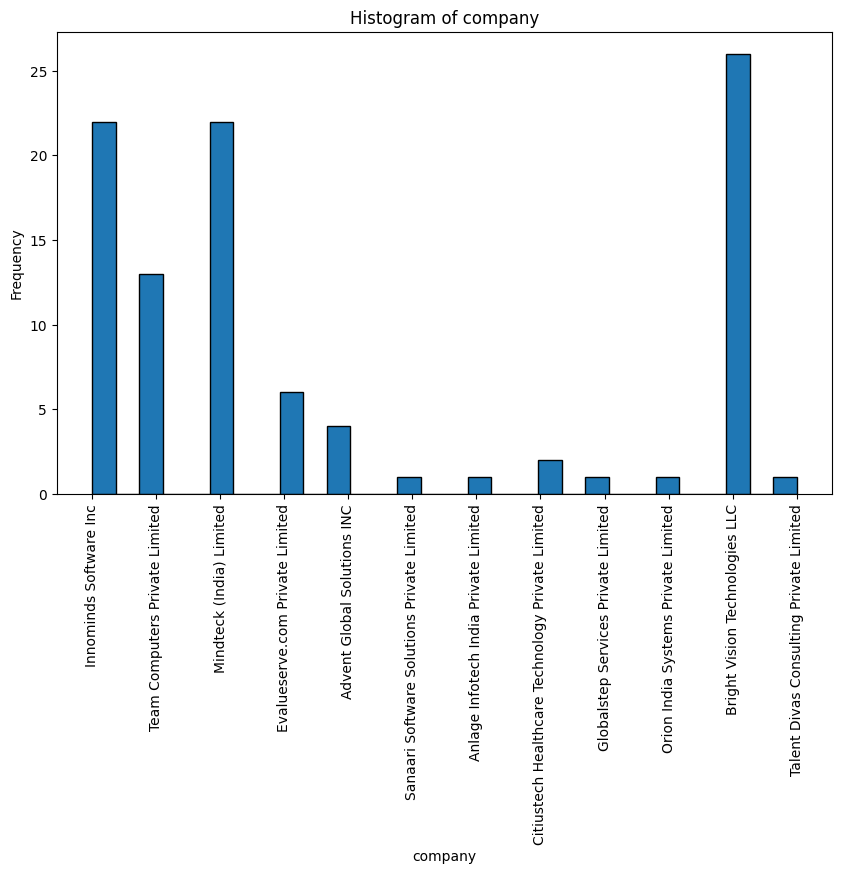

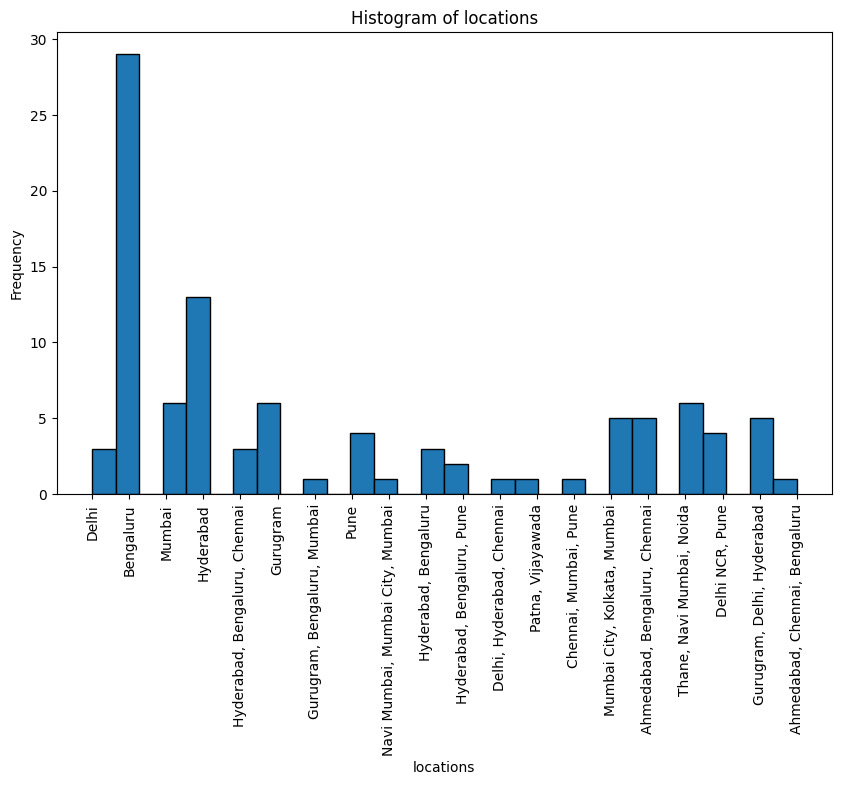

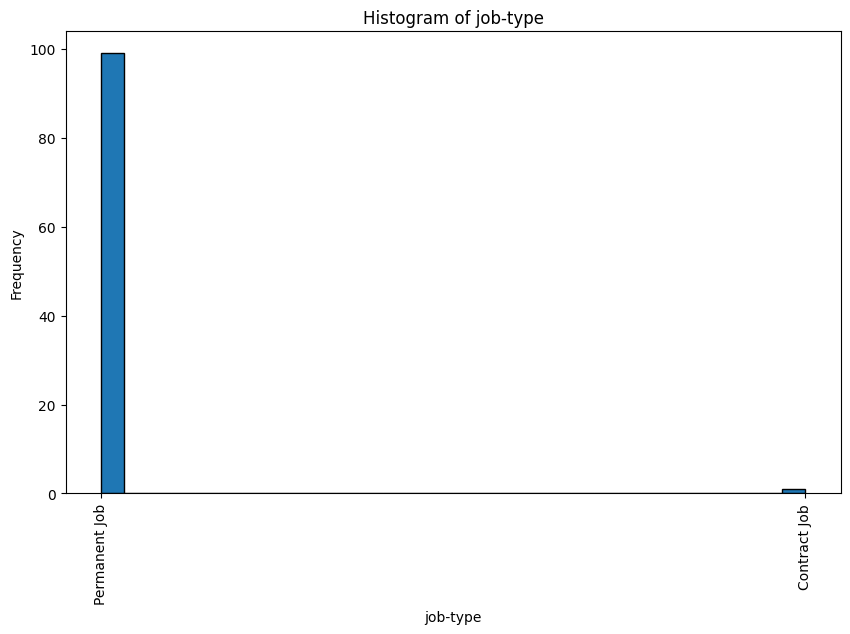

In [169]:
import matplotlib.pyplot as plt

# Created by Copilot
# A method that draw histograms from data in a specific column
def draw_histogram(dataframe, column_name):
    """
    Draws a histogram for the specified column in the dataframe.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to plot.

    Returns:
    None
    """
    if column_name in dataframe.columns:
        plt.figure(figsize=(10, 6))
        dataframe[column_name].hist(bins=30, edgecolor='black')
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)  # Rotate x-axis labels vertically
        plt.grid(False)
        plt.show()
    else:
        print(f"Column '{column_name}' does not exist in the dataframe.")

draw_histogram(df, 'company')
draw_histogram(df, 'locations')
draw_histogram(df, 'job-type')

## View missing data

In [170]:
# An array that contain the indices of rows that have any NA value
missing_data_rows = df[df.isna().any(axis=1) | (df == '').any(axis=1)]
missing_data_rows = missing_data_rows[missing_data_rows == True].index.tolist()

print("Rows with missing data: {}".format(missing_data_rows))
print("Number of rows with missing data: {}".format(len(missing_data_rows)))

Rows with missing data: [26, 48, 49]
Number of rows with missing data: 3


In [171]:
# An array that contain the columns that have any NA value
missing_data_columns = df.columns[df.isna().any() | (df == '').any()]

# Print out those columns' name
print("Columns with missing data: {}".format(missing_data_columns.values))

Columns with missing data: ['years-of-experience' 'role']


# Export the cleaned data to an Excel file

In [172]:
# Add the dataframe to a new sheet
with pd.ExcelWriter("foundit-IT.xlsx", engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name="Cleaned data", index=False)